In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv('all_stocks_5yr.csv')
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
data['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [4]:
data=data[data['Name']=='AAPL']
data.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
data.shape

(1259, 7)

In [6]:
dataset=data[['date','close']]

In [7]:
dataset1=data[['close']]
dataset1 = dataset1.values
dataset1 = dataset1.astype('float32')


In [8]:
dataset.head()

,date,close
1259,2013-02-08,67.8542
1260,2013-02-11,68.5614
1261,2013-02-12,66.8428
1262,2013-02-13,66.7156
1263,2013-02-14,66.6556


In [9]:
dataset.rename(columns={'date':'Date', 'close':'Stock_price_close'}, inplace = True)

C:\Users\Puneet Singh\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [10]:
dataset['Date']=pd.to_datetime(dataset['Date'], errors='coerce', format='%Y-%m-%d')

C:\Users\Puneet Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1259 to 2517
Data columns (total 2 columns):
Date                 1259 non-null datetime64[ns]
Stock_price_close    1259 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.5 KB


In [12]:
dataset.set_index('Date',inplace=True)

In [13]:
dataset.head()

,Stock_price_close
Date,
2013-02-08,67.8542
2013-02-11,68.5614
2013-02-12,66.8428
2013-02-13,66.7156
2013-02-14,66.6556


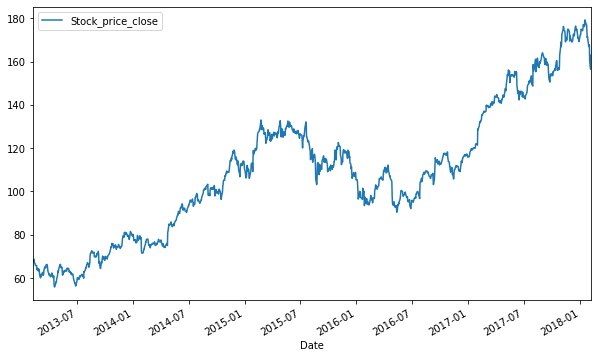

In [14]:
dataset.plot(figsize=(10,6))

# preprocess the data 

In [15]:
...
# split into train and test sets
train_size = int(len(dataset1) * 0.67)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size:], dataset1[train_size:len(dataset1):]
print(len(train), len(test))
#train

843 416


In [16]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



In [17]:
#train=train['close']
#test=test['close']
#df1=train
x_train,y_train=split_sequence(train,10)
x_test,y_test=split_sequence(test,10)

In [18]:
#for i in range(0,len(x_train)):
#df1.shape
  #  print(x_test[i],test[i])

In [19]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],n_features)
x_train.shape

(833, 10, 1)

In [20]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],n_features)
x_test.shape

(406, 10, 1)

In [21]:
from keras.layers import LSTM,Dense,Flatten
from keras.models import Sequential

Using TensorFlow backend.


In [22]:
model=Sequential()

In [23]:
#input_shape is supposed to be (timesteps, n_features). Remove the first dimension.


model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, activation='relu',return_sequences=True))
model.add(LSTM(50, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train, y_train,validation_data=(x_test,y_test) ,epochs=100,batch_size=64, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 833 samples, validate on 406 samples
Epoch 1/100
833/833 [==============================] - 3s 4ms/step - loss: 2944.0231 - val_loss: 150.9487
Epoch 2/100
833/833 [==============================] - 1s 825us/step - loss: 83.3682 - val_loss: 61.4706
Epoch 3/100
833/833 [==============================] - 1s 793us/step - loss: 21.6340 - val_loss: 21.2237
Epoch 4/100
833/833 [==============================] - 1s 968us/step - loss: 15.2768 - val_loss: 19.5909
Epoch 5/100
833/833 [==============================] - 1s 1ms/step - loss: 14.8044 - val_loss: 19.0273
Epoch 6/100
833/833 [==============================] - 1s 850us/step - loss: 14.3044 - val_loss: 17.3431
Epoch 7/100
833/833 [==============================] - 1s 769us/step - loss: 13.3384 - val_loss: 25.5295
Epoch 8/100
833/833 [==============================] - 1s 850us/step - loss: 17.2882 - val_loss: 16.8261
Epoch 9/100
833/833 [==============================] - 1s 801us/ste

833/833 [==============================] - 1s 939us/step - loss: 2.9678 - val_loss: 6.7052
Epoch 77/100
833/833 [==============================] - 1s 722us/step - loss: 2.9130 - val_loss: 8.8399
Epoch 78/100
833/833 [==============================] - 1s 926us/step - loss: 3.6235 - val_loss: 4.7558
Epoch 79/100
833/833 [==============================] - 1s 896us/step - loss: 3.8932 - val_loss: 4.5887
Epoch 80/100
833/833 [==============================] - 1s 1ms/step - loss: 3.1761 - val_loss: 9.0158
Epoch 81/100
833/833 [==============================] - 1s 1ms/step - loss: 3.5199 - val_loss: 3.7425
Epoch 82/100
833/833 [==============================] - 1s 880us/step - loss: 3.4071 - val_loss: 19.7717
Epoch 83/100
833/833 [==============================] - 1s 734us/step - loss: 5.3945 - val_loss: 12.5825
Epoch 84/100
833/833 [==============================] - 1s 867us/step - loss: 3.4158 - val_loss: 26.1925
Epoch 85/100
833/833 [==============================] - 1s 775us/step - loss: 

In [25]:
y_hat=model.predict(x_test)

In [26]:
for i in range(0,50):
    print(y_test[i],y_hat[i])

[94.4] [95.57382]
[95.6] [96.15774]
[95.89] [97.08574]
[94.99] [97.5887]
[95.53] [96.94642]
[95.94] [97.54936]
[96.68] [98.01378]
[96.98] [98.39525]
[97.42] [98.68468]
[96.87] [99.22772]
[98.79] [98.735954]
[98.78] [100.71915]
[99.83] [100.72052]
[99.87] [101.46868]
[99.96] [101.8138]
[99.43] [101.91785]
[98.66] [101.53814]
[97.34] [100.609344]
[96.67] [99.393265]
[102.95] [98.72155]
[104.34] [104.82535]
[104.21] [105.471825]
[106.05] [105.67577]
[104.48] [106.77099]
[105.79] [106.08136]
[105.87] [106.381546]
[107.48] [106.64064]
[108.37] [107.68265]
[108.81] [109.15855]
[108.] [110.63352]
[107.93] [110.45071]
[108.18] [110.46593]
[109.48] [110.73824]
[109.38] [111.74546]
[109.22] [111.7283]
[109.08] [111.505325]
[109.36] [111.42739]
[108.51] [111.75445]
[108.85] [110.69368]
[108.03] [111.03077]
[107.57] [110.1651]
[106.94] [109.74689]
[106.82] [109.27958]
[106.] [109.08834]
[106.1] [108.271194]
[106.73] [108.36721]
[107.73] [108.97597]
[107.7] [109.81774]
[108.36] [109.82512]
[105.52]

In [27]:
#df1=data[['close']]
#df1 = df1.close.values.astype('float32')

#print(type(df1))
#df1 = df1.reshape(len(df1), 1)

#train_predict=model.predict(x_train)
#test_predict=model.predict(x_test)

NameError: name 'testPredictPlot' is not defined

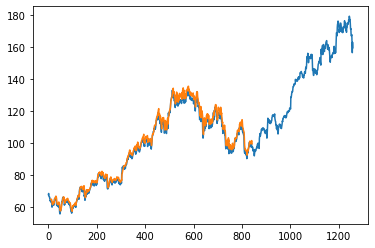

In [28]:
import numpy
look_back=10
# generate predictions for training
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset1)
#print(trainPredictPlot)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#print(trainPredictPlot)
# shift test predictions for plotting
#testPredictPlot = numpy.empty_like(dataset1)
#testPredictPlot[:, :] = numpy.nan
#testPredictPlot[len(trainPredict)+(look_back*2):len(dataset1), :] = testPredict
# plot baseline and predictions
plt.plot(dataset1)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()